## Font and Theme Customization

### 1.1 Using FontFace

In [2]:
%%html 
<style>
    @font-face {
        font-family: "Arizonia-Regular";
        src: url('./Arizonia-Regular.ttf') format("truetype");     
    }
</style>

## Altair Customization 

### Import Libraries

In [3]:
import altair as alt
import pandas as pd
import numpy as np
from vega_datasets import data
import plotly.express as px
import plotly.graph_objects as go
from altair import datum
from PIL import Image

In [4]:
# data.list_datasets()

In [5]:
# data.list_datasets()[40:60]

In [6]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
df_resampled = df.set_index("date").resample("10D", convention="start").asfreq().reset_index()

In [8]:
df[["temp_min", "temp_max"]].quantile(0.95)

temp_min    15.6
temp_max    28.9
Name: 0.95, dtype: float64

### Define Altair Themes

#### 1. Classy

In [9]:
# define the theme by returning the dictionary of configurations
def altair_classy():
    return {
        "config": {
            "stroke" : "None",
            "padding": {
                "left": 20,
                "right": 10,
                "top": 20,
                "bottom": 20
            },
            "title": {
                "font": "Arizonia-Regular",
                "fontSize" : 30,
                "subtitleFont" : "Calibri",
                "subtitleFontSize" : 18,
            },
            "axis": {
                "titleFont": "Arial",
                "titleFontSize": 18,
                "labelFontSize": 20,
            },
            "axisX": {
                "titlePadding": 10,
                "titleFont": "Arial",
                "titleFontStyle": "normal",
                "titleFontWeight": "500",
            },
            "axisY" : {
                "titlePadding" : 20,
                "titleFont": "Arial",
                "titleFontStyle": "normal",
                "titleFontWeight": "500",
            }
        }
    }

# register the custom theme under a chosen name
alt.themes.register('classy', altair_classy)

<function __main__.altair_classy()>

In [10]:
alt.themes.enable('classy')

ThemeRegistry.enable('classy')

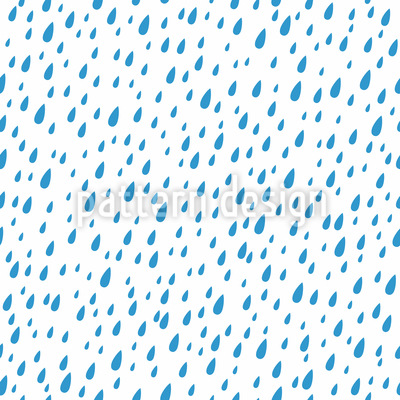

In [11]:
rain = Image.open("rain.jpg")
rain


In [12]:
df_url = pd.DataFrame.from_records({"x" : [1], "y" : [1], "url" : ["./rain.jpg"]})

In [13]:
image = alt.Chart(df_url).mark_image().encode(x="x", y="y", url="url")

In [14]:
min_temp_line = alt.Chart(df_resampled).mark_area(
    color="rgba(100, 180, 200, 1)",
    interpolate="monotone",
    opacity=1,
    clip=True,
).encode(
    y=alt.Y("temp_min:Q", axis=alt.Axis(
        grid=True,
        ticks=False,
        tickCount=10,
        labelPadding=17,
        domain=False,
        gridDash=[5,5])),
    x=alt.X("date:T", axis=alt.Axis(
        tickCount=alt.TimeIntervalStep(
            interval=alt.TimeInterval("year"), step=1
        ),
        labelPadding=15,
        format="%Y",
        domain=False,
        ticks=False,
        # gridDash=[1,2,1,5,1,3],
        gridCap="round",
        grid=False,
        labelAngle=0,
    )),
    tooltip=[
        alt.Tooltip("date", title="date"),
        alt.Tooltip("temp_min", title="min_temp")
    ]
)

max_temp_line = min_temp_line.mark_area(color="crimson", interpolate="monotone", opacity=0.6).encode(
    y=alt.Y("temp_max:Q"),
    tooltip=[
        alt.Tooltip("date", title="date"),
        alt.Tooltip("temp_max", title="max_temp")
    ]
).properties(
    width=1350,
    height=500,
    title=alt.Title("Seattle Weather for Seagulls", subtitle="A holistic view of weather from 2012-2016",
                    dx=0, dy=0,
                    baseline="middle",                    
                    anchor="start",
                    frame="group"),
)

(max_temp_line + min_temp_line).configure().configure_view(
    stroke=None,
    # fill="#f0f0f0"
)

# min_temp.mark_line().encode(
#     y=alt.Y("temp_max:Q"),
#     x=alt.X("date:O")
# )


alt.LayerChart(...)

In [15]:
source = pd.DataFrame([
    {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
    {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
    {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
    {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
    {"x": 9,  "y": 52}, {"x": 10, "y": 48},
    {"x": 11, "y": 24}, {"x": 12, "y": 49},
    {"x": 13, "y": 87}, {"x": 14, "y": 66},
    {"x": 15, "y": 17}, {"x": 16, "y": 27},
    {"x": 17, "y": 68}, {"x": 18, "y": 16},
    {"x": 19, "y": 49}, {"x": 20, "y": 15}
])

area1 = alt.Chart(source).mark_area(
    interpolate='monotone',
    opacity=0.6
).encode(
    alt.X('x').scale(zero=False, nice=False),
    alt.Y('y').title('y'),
).properties(
    width=500,
    height=75
)

# area2 = area1.encode(
#     alt.Y('ny:Q').scale(domain=[0, 50])
# ).transform_calculate(
#     "ny", alt.datum.y - 50
# )

area1

alt.Chart(...)

## Plotly Customization

In [16]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
# from plotly_wordcloud import plotly_wordcloud
from geopy.geocoders import Nominatim
import folium
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from skimage import io
import numpy as np
import re
# from jupyter_dash import JupyterDash
stopwords = set(STOPWORDS)

# Setting renderer to SVG ensures Plotly output works in multiple places:
# In VSCode and also nbconvert from jupyter notebook to HTML
# See https://plotly.com/python/renderers/#multiple-renderers
#
# A default SVG renderer is used to ensure data visualizations are loaded quickly without
# JS blocking. The default Plotly renderer produces visualizations in JSON, which is chunky
# and can block JS for an incredulous period of time, creating a disatisfying UX experience for users    
pio.renderers.default = "notebook"
# png_renderer = pio.renderers["png"]
# png_renderer.width = 1000
# png_renderer.height = 600

In [17]:
# Default dropdown menu button styling 
default_bar_dropdown_styling = dict(
    bgcolor="white",
    active=0,
    yanchor='top',
    xanchor='center',
    direction='up',
    y=-0.1,
    x=0.5,
)

# default_table_dropdown_styling = dict(
#     bgcolor="white",
#     active=0,
#     yanchor='top',
#     xanchor='center',
#     direction='down',
#     y=1.3,
#     x=0,
# )

# MACROS used for automatic calculation of table height
TABLE_CELL_HEIGHT_DEFAULT = 50
TABLE_HEADER_HEIGHT_DEFAULT = 60
TABLE_CELL_PADDING = 6
BACKGROUND_COLOR_DEFAULT = ""
# Customize Plotly figure styles
bnw = go.layout.Template(
    layout=go.Layout(
        xaxis=go.layout.XAxis(
            showgrid=False,
            zeroline=False
        ),
        # margin=go.layout.Margin(
        #     l=2,
        #     r=2
        # ),
        yaxis=go.layout.YAxis(
            showgrid=True,
            zeroline=False
        ),

        margin=go.layout.Margin(
            l=100,
            b=100
        ),
        font=go.layout.Font(
            family="Arial, Verdana",
            size=19
        ),
        title=go.layout.Title(
            font=go.layout.title.Font(
                family="Calibri Black, Arial Black",
                size=25
                
            ),
            # ),
        ),
        legend=go.layout.Legend(
            font=go.layout.legend.Font(
                size=17
            )
        ),
        plot_bgcolor="#f0f0f0",
        paper_bgcolor="#f0f0f0",
        dragmode="pan",
        showlegend=False,
        colorway=px.colors.qualitative.D3,
        uniformtext_minsize=12, uniformtext_mode="hide",
    ),
    # I cannot get hovertemplate custom configuration to work
    data=dict(
        bar=[go.Bar(hovertemplate="<b>%{x}</b><br><i>Value</i>: %{y}")],
        scatter=[go.Scatter(hovertemplate="<b>%{x}</b><br><i>Y</i>: %{y}")],
        pie=[go.Pie(hovertemplate="<b>%{label}</b><br><i>Count</i>: %{value}")],
        histogram=[go.Histogram(hovertemplate="<b>%{x}</b><br><i>Value</i>: %{y}")]
    )
)

# bnw.data.scatter = [go.Scatter(mode="lines+markers", )]?
# Add template
pio.templates["bnw"] = bnw

# If there are multiple templates delimited by +, last template takes precedence 
px.defaults.template = "bnw"

In [18]:
df_all_temp = pd.melt(df, value_vars=["temp_min", "temp_max"], id_vars=df.columns[~df.columns.isin(["temp_min", "temp_max"])], var_name="temp_type", value_name="temp")


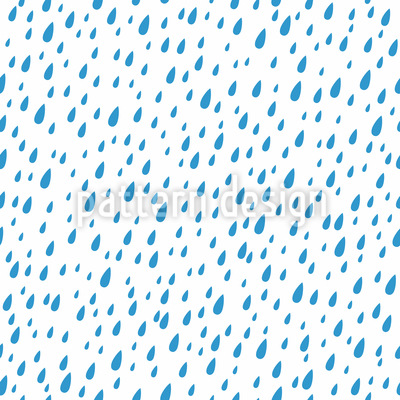
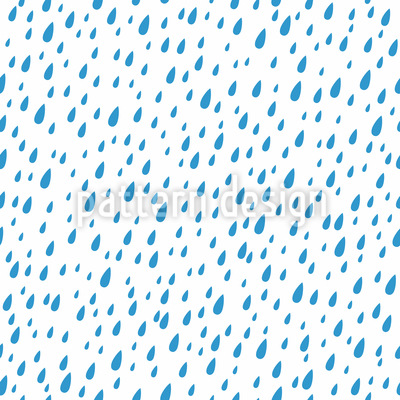
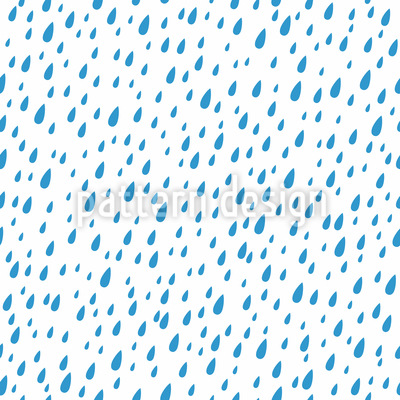
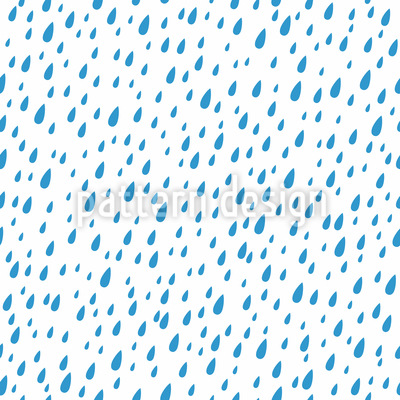

In [135]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["temp_min"], fill="tozeroy", name="Minimum Temperature", mode="none"))
fig.add_trace(go.Scatter(x=df["date"], y=df["temp_max"], fill="tonexty", line_color="rgb(255, 0, 0)", mode="none", name="Maximum Temperature"))
fig.update_layout(template="bnw", showlegend=True, title=go.layout.Title(text="Seattle Temperature", x=0.05), colorway=["blue", "red"], plot_bgcolor="lightblue",
                  paper_bgcolor="rgb(100,180,240)")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Temperature (C)")

for i in range(3):
    fig.add_layout_image(
        source=rain,
        xref="paper",
        yref="paper",
        sizing="fill",
        x=i * 0.3,
        xanchor="left", 
        yanchor="bottom",
        y=0,
        sizex=0.3,
        sizey=1,
        layer="below",
        opacity=0.25
    )

fig.add_layout_image(
        source=rain,
        xref="paper",
        yref="paper",
        sizing="fill",
        x=0.9,
        xanchor="left", 
        yanchor="bottom",
        y=0,
        sizex=0.1,
        sizey=1,
        layer="below",
        opacity=0.25
    )

fig


# fig.update_layout(title="Seattle Weather")

In [236]:

fig.update_layout(showlegend=True)